# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
#dependencies
import os
import requests
import json
import pandas as pd
import random
import numpy as np
from citipy import citipy
import gmaps
import matplotlib.pyplot as plt
from pprint import pprint
from config import w_api

## Generate Cities List

In [11]:
# cities list
cities=[]
# latitude and longitude list
loc=[]

# crate random latitude and longitude locations
lat = np.random.uniform(low=-90,high=90.,size=1500)
lng= np.random.uniform(low=-180,high=180.,size=1500)

# combine them into a list
locs= zip(lat,lng)

# print(tuple(loc))


In [12]:
# pick cities closest to random locations
for loc in locs:
    city = citipy.nearest_city(loc[0],loc[1]).city_name
    
    # check if city is in list, if not, add it.
    if city not in cities:
        cities.append(city)

# confirm number of cities
len(cities)


630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# create url for requests
units="Imperial"
api= f"&APPID={w_api}"
url = f"https://api.openweathermap.org/data/2.5/weather?{units}{api}"

# create list for data retreived from openweathermap
city_data =[]


# show data retrieval
print("Beginning Data Retrieval \n"     
    "-----------------------------")
set_count =1
record_count = 1

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # try statement to skip cties that don't exist in data
    try:
        city_weather = requests.get(city_url).json()
        
    # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # add info to list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    except:
        print("City not found. Skipping...")
        pass
print("Data retrieval is complete.")


Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | puebloviejo
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | san andres
Processing Record 5 of Set 1 | bytow
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | rosetown
Processing Record 8 of Set 1 | inverell
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | rehoboth
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | dunda
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | hofn
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | menomonie
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:

# create data frame from requests
city_data_df= pd.DataFrame(city_data)



# Exports DataFrame as a csv file
city_data_df.to_csv("../output_data/city_data_df.csv",
                    encoding="utf-8", header=True)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,288.88,59,0,3.60,US,1655103142
1,puebloviejo,10.9938,-74.2844,298.28,77,32,2.26,CO,1655103143
2,busselton,-33.6500,115.3333,289.30,69,85,7.05,AU,1655103145
3,san andres,12.5847,-81.7006,300.16,89,75,2.57,CO,1655103147
4,bytow,54.1706,17.4919,287.15,74,19,3.34,PL,1655103148
5,puerto ayora,-0.7393,-90.3518,295.12,91,86,0.89,EC,1655103149
6,rosetown,51.5501,-108.0014,288.14,67,99,5.14,CA,1655103152
7,inverell,-29.7833,151.1167,283.79,50,0,1.45,AU,1655103153
8,bethel,41.3712,-73.4140,292.79,96,100,0.94,US,1655103125
9,nikolskoye,59.7035,30.7861,291.97,54,10,2.76,RU,1655103157


In [54]:
# describe Humidty for count check and max value
city_data_df["Humidity"].describe()

count    585.000000
mean      68.388034
std       22.879857
min        1.000000
25%       55.000000
50%       75.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#no cities over 100% humidity

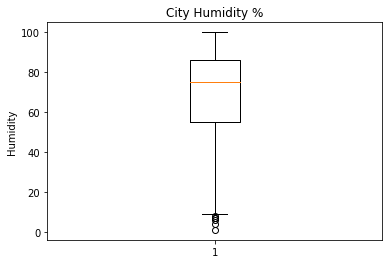

585

In [61]:
# Visual check of data for outliers
humidity_df = pd.read_csv("../output_data/city_data_df.csv")
humidity =humidity_df["Humidity"]

fig1, ax1 = plt.subplots()
ax1.set_title('City Humidity %')
ax1.set_ylabel("Humidity")
ax1.boxplot(humidity)
plt.show()
# count of values for comparision in next step
len(humidity_df)


In [62]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(humidity_df["Humidity"], inplace=False)

# count of values for comparision
len (clean_city_data)



490

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

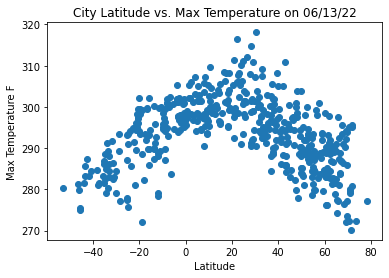

In [63]:
# Plot of Lat vs Max Temp
# import of time dependecie dates can be added to plots
import time

# Creation of scatter plot lat vs temp
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Max Temperature on "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature F')
plt.show()

## Latitude vs. Humidity Plot

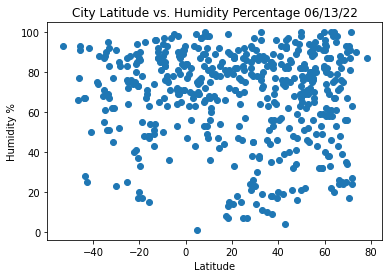

In [64]:
# Creation of scatter plot  lat vs humidity
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Humidity Percentage "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

## Latitude vs. Cloudiness Plot

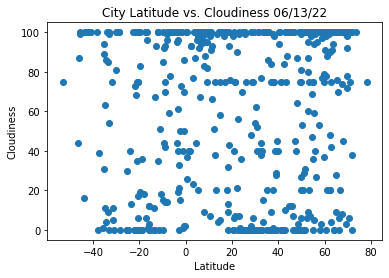

In [66]:
# Creation of scatter plot lat vs cloudiness
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

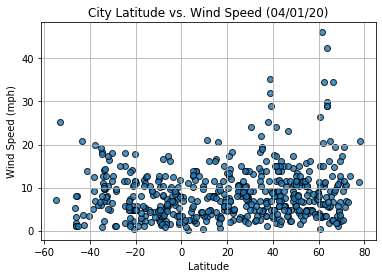

In [13]:
# Creation of scatter plot lat vs wind speed
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


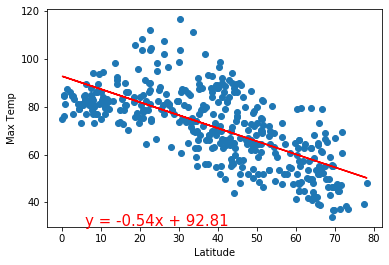

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


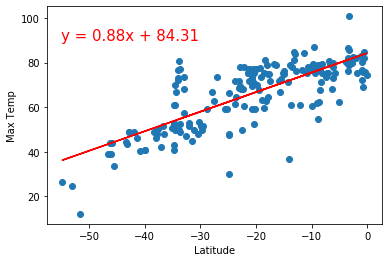

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


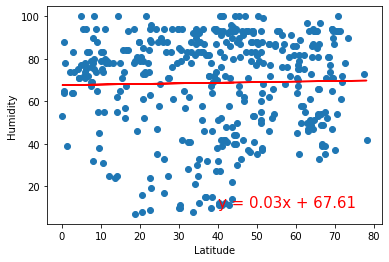

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


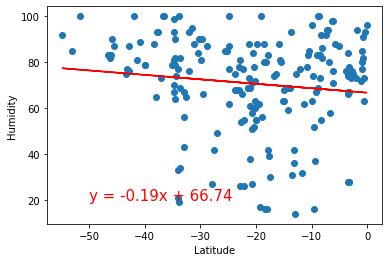

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


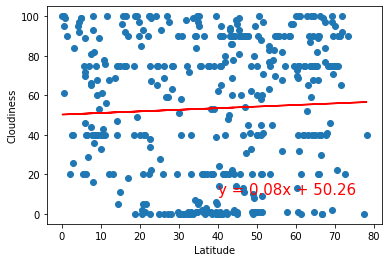

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


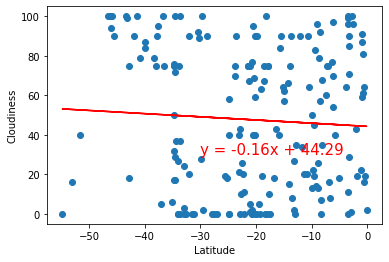

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


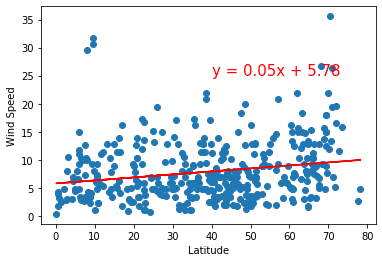

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


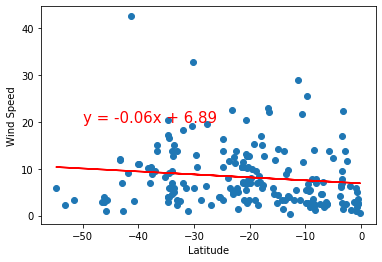